# Practical work 08 - Clustering

## Imports

In [137]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import seaborn as sns

## Exercise 1 - Getting the data

a) Load the two given datasets:

In [138]:
data1, label1 = pickle.load(open("dataset_1.pkl", "rb"), encoding ="latin1")
data2, label2 = pickle.load(open("dataset_2.pkl", "rb"), encoding ="latin1")

b) Visualize the data using various color for each unique labels

c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

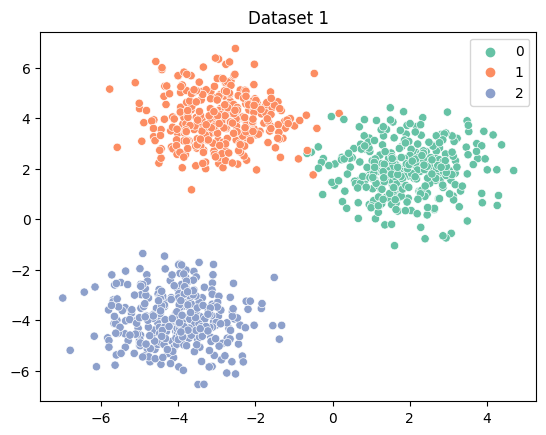

In [139]:
# plot the clusters of dataset 1
plt.figure(1)
sns.scatterplot(x=data1[:,0], y=data1[:,1], hue=label1, palette="Set2")
plt.title("Dataset 1")
plt.show()

c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

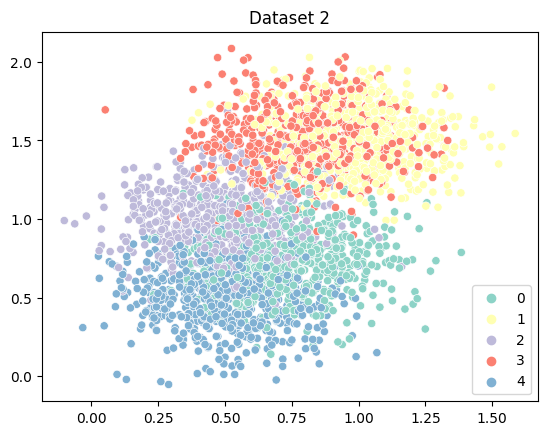

In [140]:
# plot the clusters of dataset 2
plt.figure(2)
sns.scatterplot(x=data2[:,0], y=data2[:,1], hue=label2, palette="Set3")
plt.title("Dataset 2")
plt.show()

## Exercise 2 - The $k$-means algorithm

a) Initialise the centroids $\mu_1, \mu_2, ... , \mu_K$

In [141]:
# initialize the centroids
def init_centroids(data, k):
    centroids = []
    for i in range(k):
        j = np.random.randint(0, len(data))
        centroids.append(data[j])
    return centroids

b) Until convergence :

<span style="margin-left: 20px;">i) Find the closest centroid for each point</span>

In [142]:
# calculate the euclidean distance between two points
def euclidean_distance(x, y):
    return sqrt(sum(pow(a-b, 2) for a, b in zip(x, y)))

# assign each data point to the closest centroid
def assign_centroids(data, centroids):
    clusters = []
    for x in data:
        distances = []
        for c in centroids:
            distances.append(euclidean_distance(x, c))
        clusters.append(distances.index(min(distances)))
    return clusters

<span style="margin-left: 20px;">ii) Reevaluate the centroids</span>

In [143]:
# calculate the new centroids
def newcentroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroids.append(np.mean(cluster, axis=0))
    return new_centroids

c) Return the $k$ centroids.

In [144]:
def same(centroids, new_centroids):
    for i in range(len(centroids)):
        if not np.array_equal(centroids[i], new_centroids[i]):
            return False
    return True

def kmeans(data, k):
    history = []
    centroids = init_centroids(data, k)
    clusters = assign_centroids(data, centroids)
    new_centroids = init_centroids(data, k)
    while not same(centroids, new_centroids):
        centroids = new_centroids
        clusters = assign_centroids(data, centroids)
        new_centroids = newcentroids(data, clusters, k)
        history.append(centroids)
    return clusters, new_centroids, history

We also ask you to define and implement strategies for the :

* Initialisation of the centroids.
* Convergence criteria.

We choose to do the initialisation by randomly choosing $k$ points from the dataset. For the convergence criteria, we choose to stop the algorithm when the centroids don't change anymore.

## Exercise 3 - Evaluate your model

Run your algorithm with the dataset 1.

In [145]:
# Your code here
# run k-means on dataset 1
k = 3
clusters1, centroids, history = kmeans(data1, k)

Visualize your convergence criteria over the epochs using the dataset 1.

In [159]:
def get_evolution(history, cluster_nb):
      evolution = []
      for i in range(len(history)):
         evolution.append(history[i][cluster_nb])
      return evolution

In [162]:
# get the evolution of centroids of cluster 1
evolution1 = get_evolution(history, 0)
evolution2 = get_evolution(history, 1)
evolution3 = get_evolution(history, 2)

c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

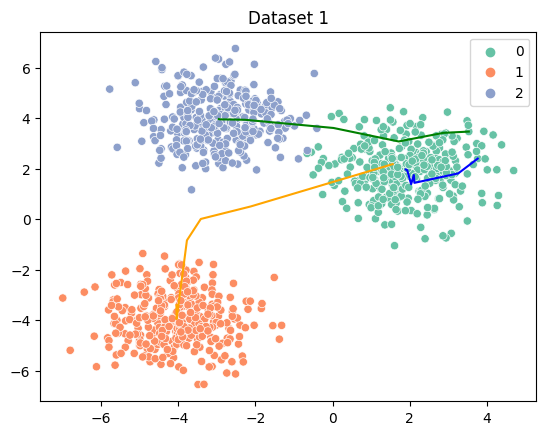

In [163]:
# plot the clusters of dataset 1 and add the evolution of centroids
plt.figure(3)
sns.scatterplot(x=data1[:,0], y=data1[:,1], hue=clusters1, palette="Set2")
sns.lineplot(x=[x[0] for x in evolution1], y=[x[1] for x in evolution1], color="blue")
sns.lineplot(x=[x[0] for x in evolution2], y=[x[1] for x in evolution2], color="orange")
sns.lineplot(x=[x[0] for x in evolution3], y=[x[1] for x in evolution3], color="green")
plt.title("Dataset 1")
plt.show()

Visualize the output of your $k$-means on the dataset 1.

c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

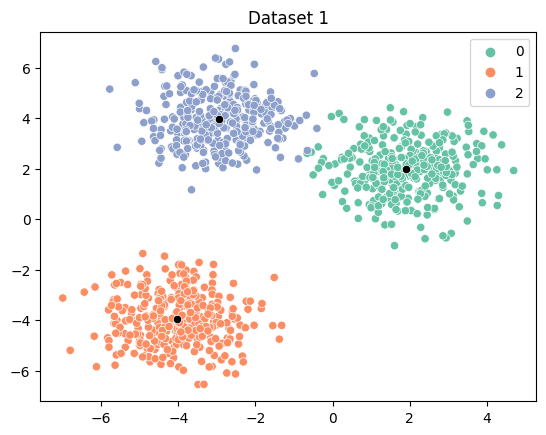

In [147]:
# plot the clusters of dataset 1 with the centroids
plt.figure(4)
sns.scatterplot(x=data1[:,0], y=data1[:,1], hue=clusters1, palette="Set2")
sns.scatterplot(x=[c[0] for c in centroids], y=[c[1] for c in centroids], color="black")
plt.title("Dataset 1")
plt.show()

Do you experience sensitivity to the initial values of the centroids? Is your strategy for initialization working well in most cases?

Yes there is a sensitivity to the initial values of the centroids. Our strategy for initialization is working well in most cases, but we can observe that the solution varies when we run the algorithm several times. And this is due to the initialisation of the centroids.

Document your convergence criteria. Could you think about other convergence criteria?

We choose to stop the algorithm when the centroids don't change anymore. We could also stop the algorithm after a certain number of iterations.

Run your algorithm with the dataset 2.

In [164]:
# run k-means on dataset 2
k = 5
clusters2, centroids, history = kmeans(data2, k)

Visualize your convergence criteria over time using the dataset 2.

In [165]:
# get the evolution of centroids of cluster 
evolution1 = get_evolution(history, 0)
evolution2 = get_evolution(history, 1)
evolution3 = get_evolution(history, 2)
evolution4 = get_evolution(history, 3)
evolution5 = get_evolution(history, 4)

c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

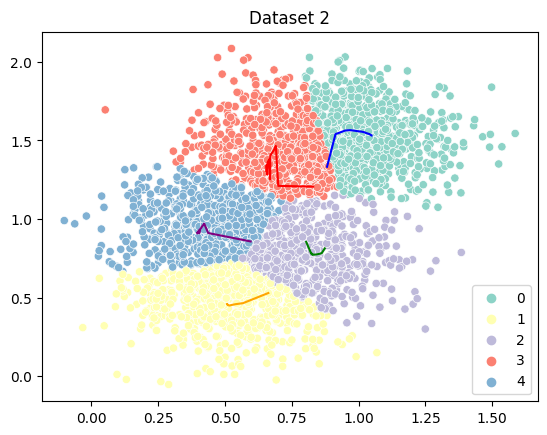

In [166]:
# plot the clusters of dataset 2 and add the evolution of centroids
plt.figure(5)
sns.scatterplot(x=data2[:,0], y=data2[:,1], hue=clusters2, palette="Set3")
sns.lineplot(x=[x[0] for x in evolution1], y=[x[1] for x in evolution1], color="blue")
sns.lineplot(x=[x[0] for x in evolution2], y=[x[1] for x in evolution2], color="orange")
sns.lineplot(x=[x[0] for x in evolution3], y=[x[1] for x in evolution3], color="green")
sns.lineplot(x=[x[0] for x in evolution4], y=[x[1] for x in evolution4], color="red")
sns.lineplot(x=[x[0] for x in evolution5], y=[x[1] for x in evolution5], color="purple")
plt.title("Dataset 2")
plt.show()

Visualize the output of your $k$-means on the dataset 2 and comment your results.

c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

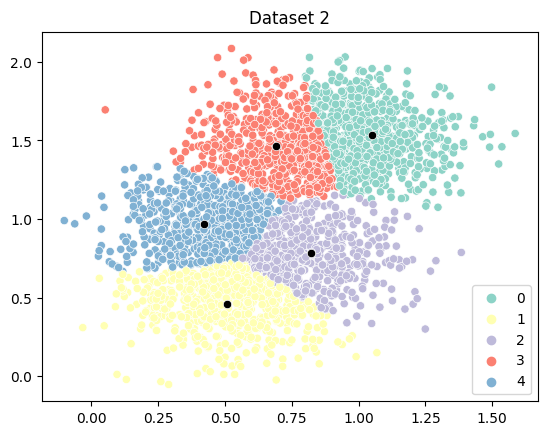

In [167]:
# Your code here
# plot the clusters of dataset 2 with the centroids
plt.figure(6)
sns.scatterplot(x=data2[:,0], y=data2[:,1], hue=clusters2, palette="Set3")
sns.scatterplot(x=[c[0] for c in centroids], y=[c[1] for c in centroids], color="black")
plt.title("Dataset 2")
plt.show()

_Your comment_

The results seem to be good. The centroids are well placed in the middle of the clusters. The evolution of the centroids is also good. 
The centroids are moving towards the center of the clusters.